In [213]:
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import emg_utils as eu

import importlib
importlib.reload(eu)

%matplotlib widget

## Load Data

bagpy is used to load bag files. 
A list of bagreaders is made. One bagreader for each trial. So if an experiment was performed 4 times, a list of 4 bagreaders will be made.

In [259]:
# directory = '/home/jin/work/MT/predictive-exoskeleton/analysis/data/unloading/' # home
directory = '/home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/' # uni

anonymize = {1: '06_14_nat_unloading', 2: '06_15_chris_unloading', 3: '06_15_joh_unloading'}
target = 1

directory = directory + anonymize[target]


In [260]:
# save_dir = '/home/jin/work/MT/plots/subject' + str(target) + '/' # home
save_dir = '/home/ics-student/students/jinho/MA/plots/unloading/subject' + str(target) + '/' # uni
save_dir

'/home/ics-student/students/jinho/MA/plots/unloading/subject1/'

In [261]:
# b = []
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
#     if not os.path.isdir(f):
#         b.append(bagreader(f))

calibration = []
trial = []
baseline = []
mvc = []

for filename in os.listdir(directory):
    file = os.path.splitext(filename)[0]
    f = os.path.join(directory, filename)
    if not os.path.isdir(f):
        if file == 'calibration':
            calibration.append(bagreader(f))
        elif file.find('trial') != -1:
            trial.append(bagreader(f))
        elif file.find('baseline') != -1:
            baseline.append(bagreader(f))
        elif file.find('mvc') != -1:
            mvc.append(bagreader(f))

[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2 already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1 already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/mvc already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3 already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/calibration already exists. Not creating.
[INFO]  Data folder /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3 already exists. Not creating.
[I

In [84]:
trial[0].topic_table

Topics                         Types  Message Count   Frequency
0             Ws              std_msgs/Float64          30819  200.038345
1   compensation              std_msgs/Float64          30819  200.043115
2        down_Ws              std_msgs/Float64          30819  200.052657
3    down_sensor              std_msgs/Float64           9656   66.342476
4        emg_raw    std_msgs/Float64MultiArray           5272   19.366788
5        emg_rms              std_msgs/Float64           5298   19.406215
6    held_object  darknet_ros_msgs/BoundingBox             38    0.359176
7     load_trial           sync_msgs/MassTrial             10    0.066667
8      load_type           sync_msgs/TrialType             30    0.333333
9    mass_change           sync_msgs/MassTrial             38    0.359075
10         state                exo_msgs/state          30829  200.024035
11         up_Ws              std_msgs/Float64          30819  200.024035
12     up_sensor              std_msgs/Float64           9663   66.341426

In [4]:
emg_frequency = trial[0].topic_table.Frequency[4]

### Create csv files of given topics
Topics of all bagfiles saved in a list in corresponding order

In [262]:
trial_emg_list = []
trial_rms_list = []
trial_type_list = []
trial_state_list = []
trial_mass_list = []
baseline_emg_list = []
baseline_rms_list = []
baseline_type_list = []


for bag in trial:
    if len(os.listdir(bag.datafolder)) == 0:
        trial_emg_list.append(bag.message_by_topic('emg_raw'))
        trial_rms_list.append(bag.message_by_topic('emg_rms'))
        trial_type_list.append(bag.message_by_topic('load_type'))
        trial_state_list.append(bag.message_by_topic('state'))
        trial_mass_list.append(bag.message_by_topic('mass_change'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in os.listdir(bag.datafolder):
            file = os.path.splitext(csv)[0]
            target_path = os.path.join(bag.datafolder, csv)
            if 'emg_raw'.find(file) != -1:
                trial_emg_list.append(target_path)
            elif 'emg_rms'.find(file) != -1:
                trial_rms_list.append(target_path)
            elif 'load_type'.find(file) != -1:
                trial_type_list.append(target_path)
            elif 'state'.find(file) != -1:
                trial_state_list.append(target_path)
            elif 'mass_change'.find(file) != -1:
                trial_mass_list.append(target_path)

for bag in baseline:
    folder = os.listdir(bag.datafolder)
    if len(folder) == 0:
        baseline_emg_list.append(bag.message_by_topic('emg_raw'))
        baseline_rms_list.append(bag.message_by_topic('emg_rms'))
        baseline_type_list.append(bag.message_by_topic('load_type'))
    else:
        print("CSV files already exist for: ", bag.datafolder)
        for csv in folder:
            file = os.path.splitext(csv)[0]
            target_path = os.path.join(bag.datafolder, csv)
            if 'emg_raw'.find(file) != -1:
                baseline_emg_list.append(target_path)
            elif 'emg_rms'.find(file) != -1:
                baseline_rms_list.append(target_path)
            elif 'load_type'.find(file) != -1:
                baseline_type_list.append(target_path)


CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial2
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial3
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/trial1
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline1
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline3
CSV files already exist for:  /home/ics-student/students/jinho/MA/repo/predictive-exoskeleton/analysis/data/unloading/06_14_nat_unloading/baseline2


### Create pandas data frames from csv files

Function to convert csv to data frame:

In [193]:
def csv2df(csv_list):
    df_list = []
    for csv in csv_list:
            df_list.append(pd.read_csv(csv))
    return df_list

In [263]:
trial_emg_dflist = csv2df(trial_emg_list)
trial_rms_dflist = csv2df(trial_rms_list)
trial_type_dflist = csv2df(trial_type_list)
trial_state_dflist = csv2df(trial_state_list)
trial_mass_dflist = csv2df(trial_mass_list)

baseline_emg_dflist = csv2df(baseline_emg_list)
baseline_rms_dflist = csv2df(baseline_rms_list)
baseline_type_dflist = csv2df(baseline_type_list)

## Plot EMG data

In [195]:
plt.style.use('seaborn')

In [264]:
# MVC
mvc_csv = mvc[0].message_by_topic('/rms_samples')
mvc_max = pd.read_csv(mvc_csv)['data'].max()
print("MVC: " + str(mvc_max))

MVC: 0.0837975294663056


In [197]:
window_length = 40 # 25
ymin = 0.05
ymax = 0.2

### Per Trial Plot

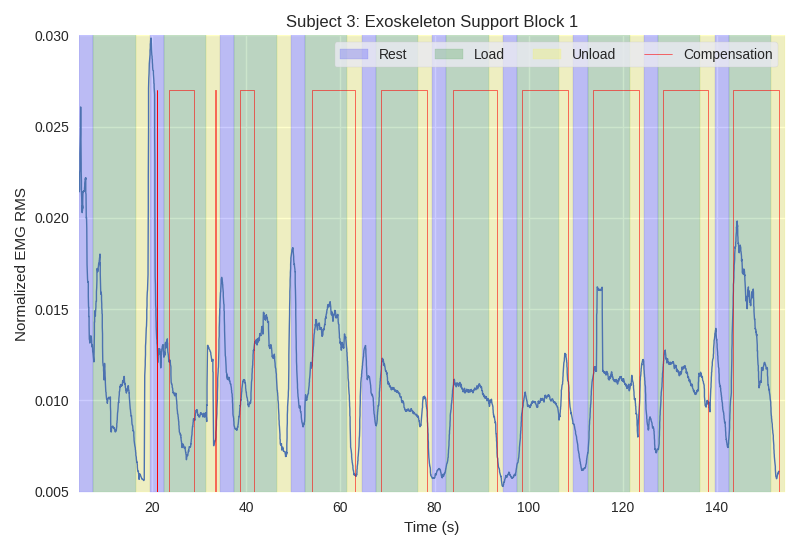

In [159]:
# plt.close('all')
i = 0
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Subject ' + str(target) + ': Exoskeleton Support Block ' + str(i+1))
plt.tight_layout()

plt.savefig(save_dir+'support'+str(i+1), format='png')

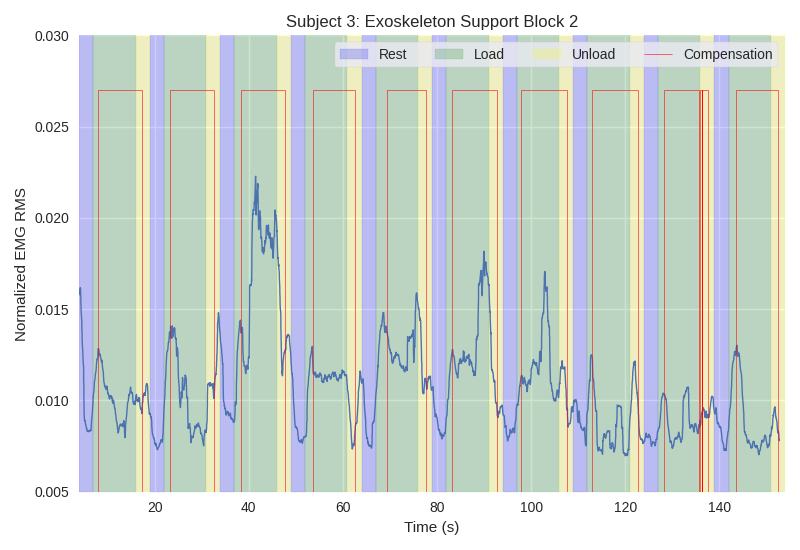

In [160]:
i = 1
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Subject ' + str(target) + ': Exoskeleton Support Block ' + str(i+1))
plt.tight_layout()

plt.savefig(save_dir+'support'+str(i+1), format='png')

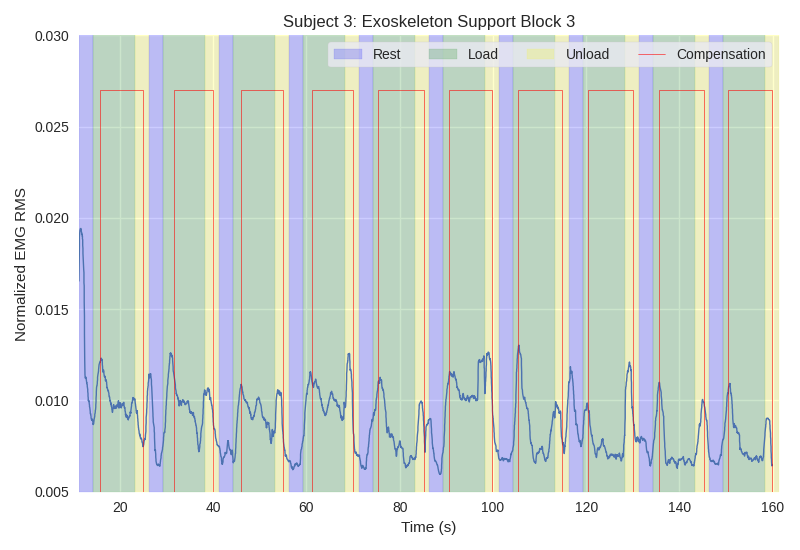

In [161]:
i = 2
figure, axis = plt.subplots()
eu.single_EMG(axis, trial_type_dflist[i], trial_emg_dflist[i], window_length, True, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Subject ' + str(target) + ': Exoskeleton Support Block ' + str(i+1))
plt.tight_layout()

plt.savefig(save_dir+'support'+str(i+1), format='png')

### Per Baseline Plot

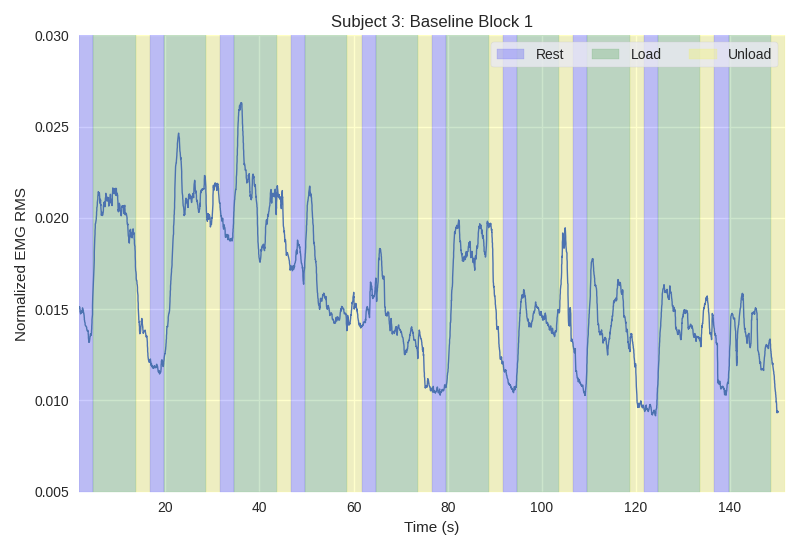

In [162]:
# plt.close('all')
i = 0
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Subject ' + str(target) + ': Baseline Block ' + str(i+1))
plt.tight_layout()

plt.savefig(save_dir+'baseline'+str(i+1), format='png')

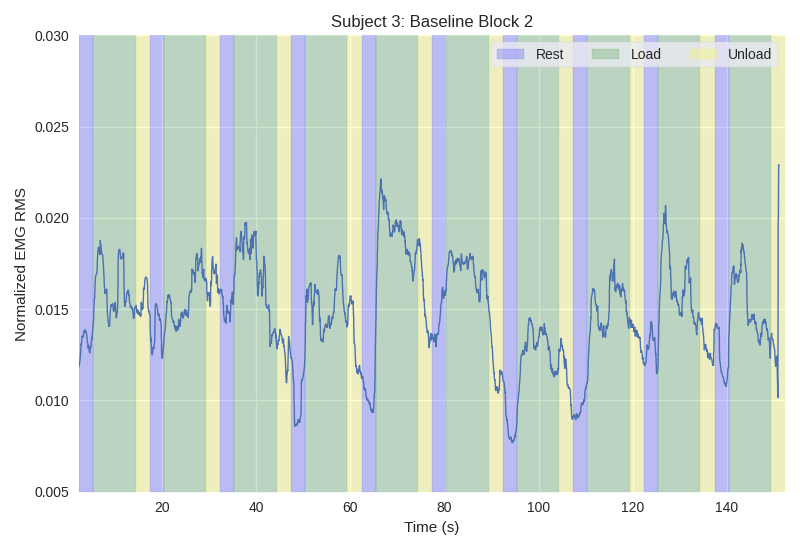

In [163]:
i = 1
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Subject ' + str(target) + ': Baseline Block ' + str(i+1))
plt.tight_layout()

plt.savefig(save_dir+'baseline'+str(i+1), format='png')

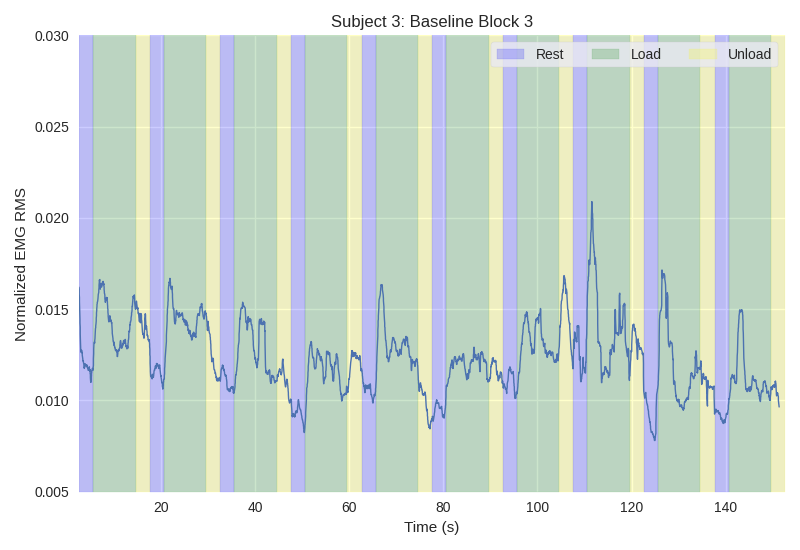

In [164]:
i = 2
figure, axis = plt.subplots()
eu.single_EMG(axis, baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], ymin, ymax, mvc_max)
axis.set_title('Subject ' + str(target) + ': Baseline Block ' + str(i+1))
plt.tight_layout()

plt.savefig(save_dir+'baseline'+str(i+1), format='png')

### Exoskeleton, Baseline EMG side by side

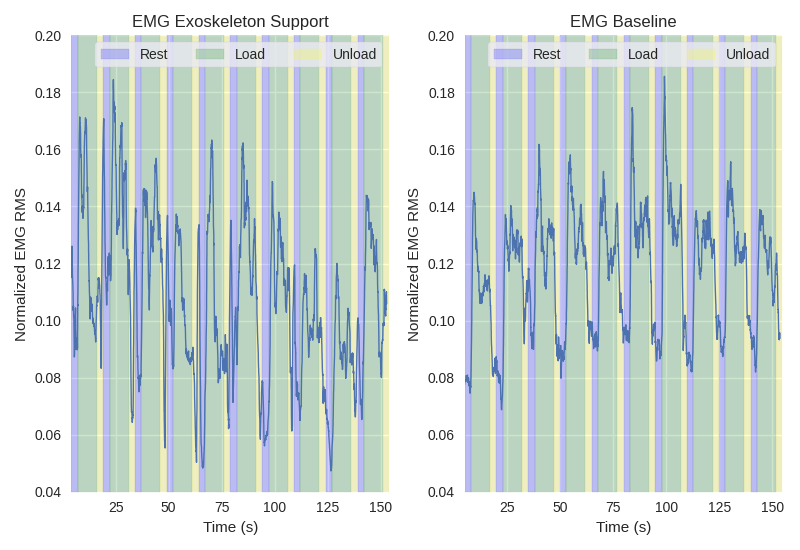

In [16]:
# plt.close('all')
i = 0
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

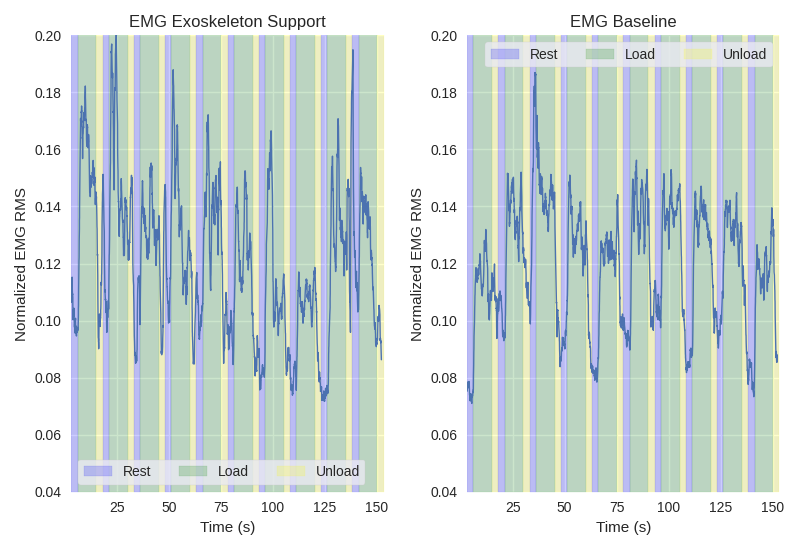

In [17]:
i = 1
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

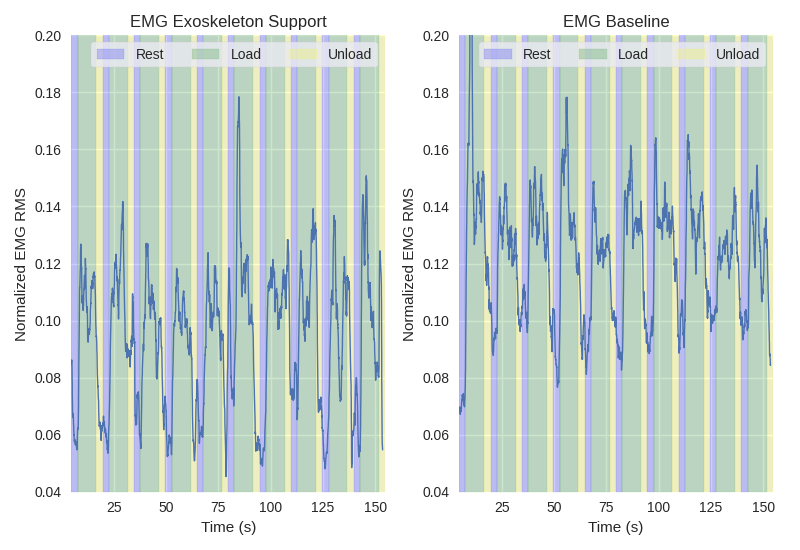

In [18]:
i = 2
figure, axis = eu.EMG_comp(trial_type_dflist[i], trial_emg_dflist[i], baseline_type_dflist[i], baseline_emg_dflist[i], window_length, False, trial_mass_dflist[i], 'horizontal', 0.04, 0.20, mvc_max)
plt.tight_layout()

## Overview Plot

In [165]:
limits = [[0.005, 0.03],
          [30, 120],
          [-0.5, 0.5]]

### 1 Trial

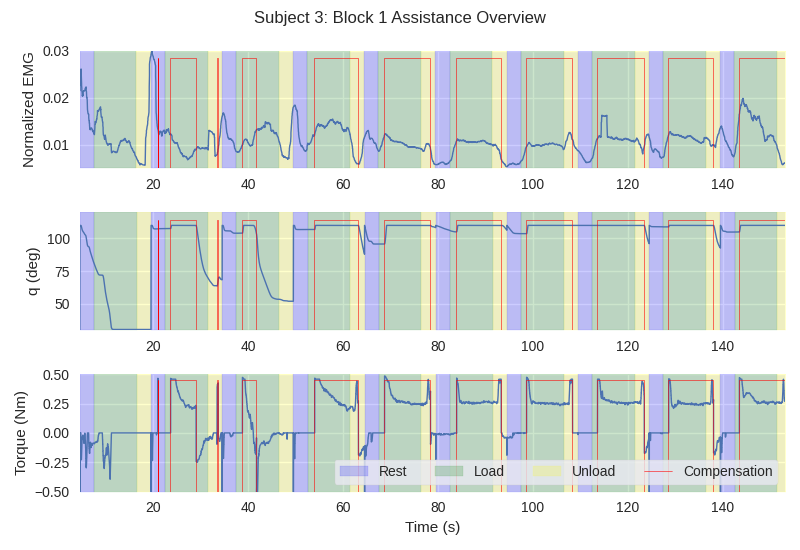

In [167]:
i = 0
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], 
                                window=window_length, mvc=mvc_max, limits=limits)
# figure.suptitle('Subject ' + str(target) + ', Block ' + str(i+1) + ', Exo Support')
figure.suptitle('Subject ' + str(target) + ': Block ' + str(i+1) + ' Assistance Overview')
plt.tight_layout()

plt.savefig(save_dir+'overview'+str(i+1), format='png')

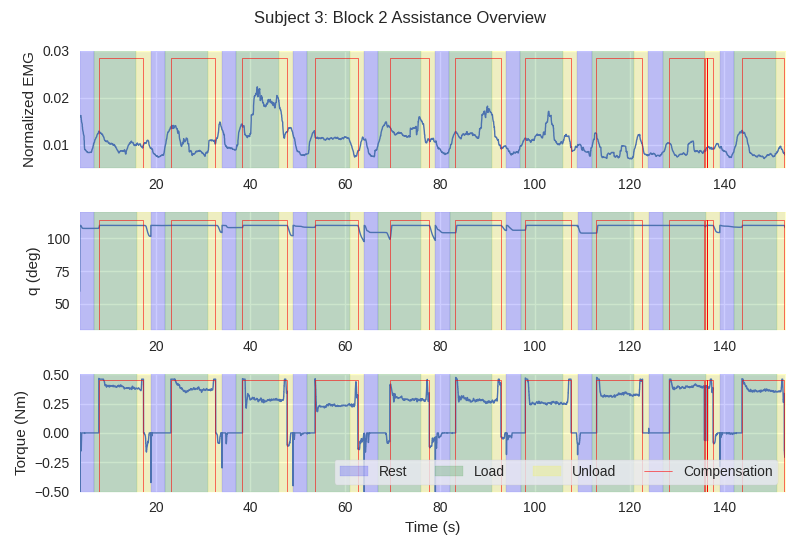

In [168]:
i = 1
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], 
                                window=window_length, mvc=mvc_max, limits=limits)
# figure.suptitle('Subject ' + str(target) + ', Block ' + str(i+1) + ', Exo Support')
figure.suptitle('Subject ' + str(target) + ': Block ' + str(i+1) + ' Assistance Overview')
plt.tight_layout()

plt.savefig(save_dir+'overview'+str(i+1), format='png')

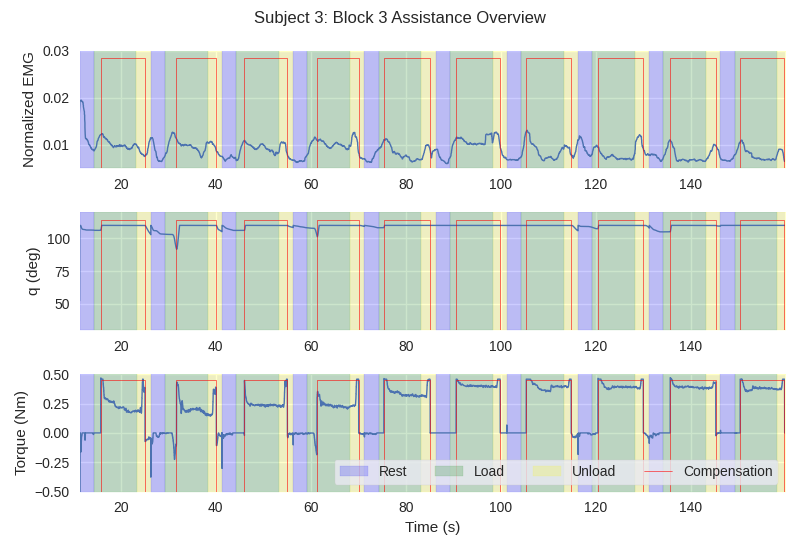

In [169]:
i = 2
figure, axes = eu.plot_overview(trial_type=trial_type_dflist[i], emg=trial_emg_dflist[i], state=trial_state_dflist[i], mass=trial_mass_dflist[i], 
                                window=window_length, mvc=mvc_max, limits=limits)
# figure.suptitle('Subject ' + str(target) + ', Block ' + str(i+1) + ', Exo Support')
figure.suptitle('Subject ' + str(target) + ': Block ' + str(i+1) + ' Assistance Overview')
plt.tight_layout()

plt.savefig(save_dir+'overview'+str(i+1), format='png')

## Average Plots

In [170]:
average_limit = [0.005, 0.03]

### Average Plot over all blocks

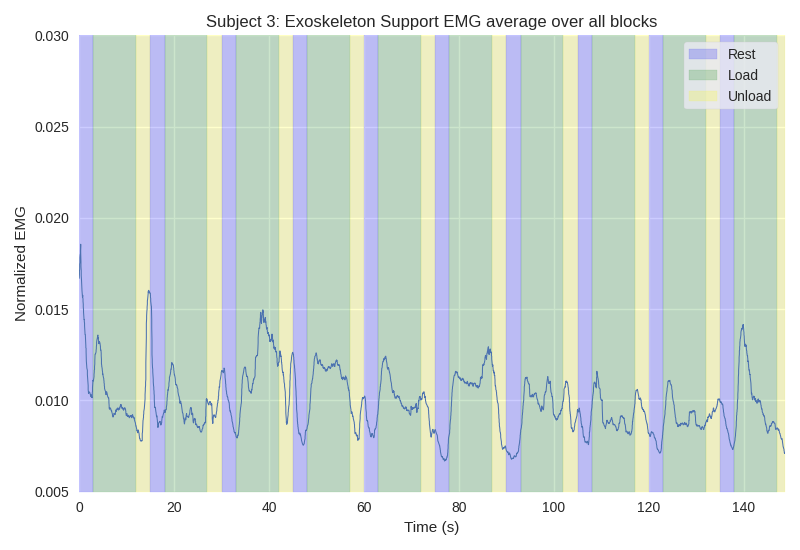

In [172]:
plt.close('all')
figure, axis = plt.subplots()
eu.plot_average(axis, trial_emg_dflist, trial_type_dflist, window_length, average_limit[0], average_limit[1], mvc_max)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject '+str(target)+': Exoskeleton Support EMG average over all blocks')
plt.tight_layout()

plt.savefig(save_dir+'support_average', format='png')

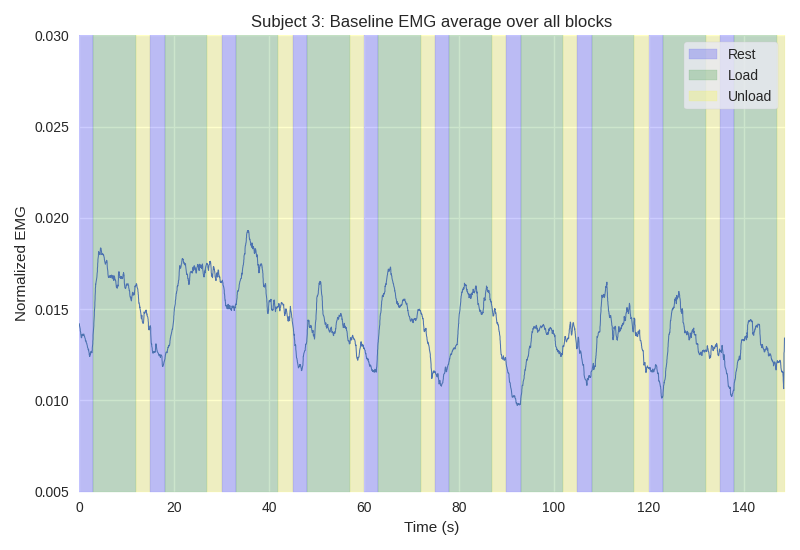

In [173]:
plt.close('all')
figure, axis = plt.subplots()
eu.plot_average(axis, baseline_emg_dflist, baseline_type_dflist, window_length, average_limit[0], average_limit[1], mvc_max)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject '+str(target)+': Baseline EMG average over all blocks')
plt.tight_layout()

plt.savefig(save_dir+'baseline_average', format='png')

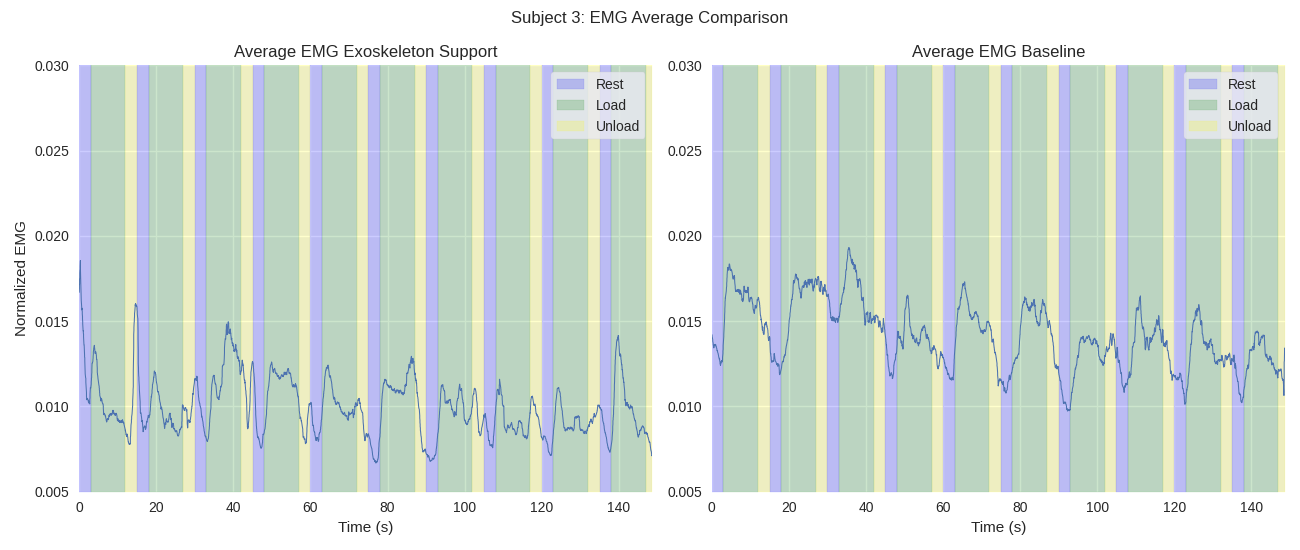

In [174]:
plt.close('all')
figure, axis = eu.average_EMG_comp(trial_type_dflist, trial_emg_dflist, baseline_type_dflist, baseline_emg_dflist, window_length, 'horizontal', average_limit[0], average_limit[1], mvc_max)
axis[0].set_ylabel('Normalized EMG')
axis[0].set_xlabel('Time (s)')
axis[1].set_xlabel('Time (s)')
figure.suptitle('Subject ' + str(target) + ': EMG Average Comparison')
figure.set_figwidth(13)
plt.tight_layout()
# figure.set_figheight()

plt.savefig(save_dir+'average_comparison', format='png')

### Average trial plot per block

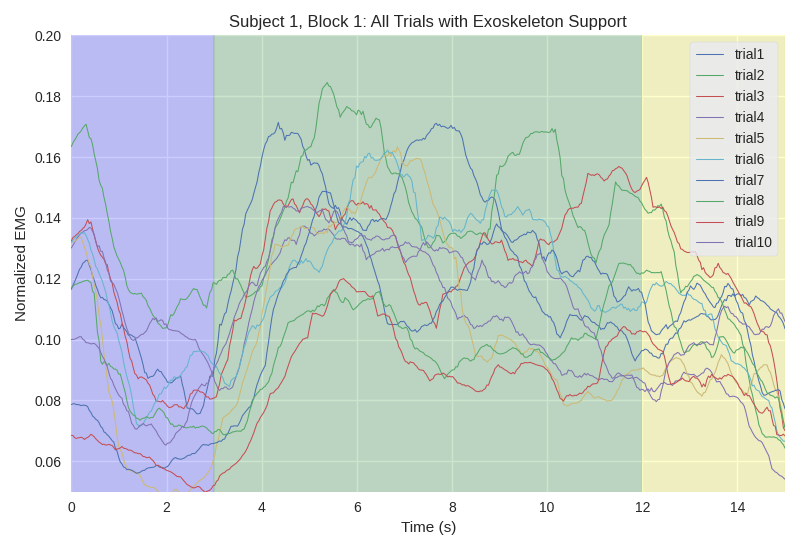

In [122]:
i = 0
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, [ymin, ymax], True)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': All Trials with Exoskeleton Support')
plt.tight_layout()

# plt.savefig(save_dir+'all_trials_block'+str(i+1), format='png')

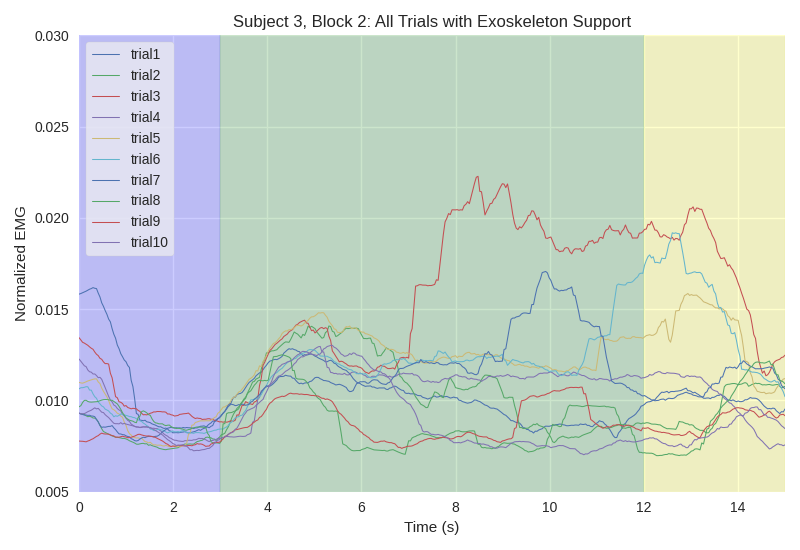

In [176]:
i = 1
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, [ymin, ymax], True)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': All Trials with Exoskeleton Support')
plt.tight_layout()

plt.savefig(save_dir+'all_trials_block'+str(i+1), format='png')

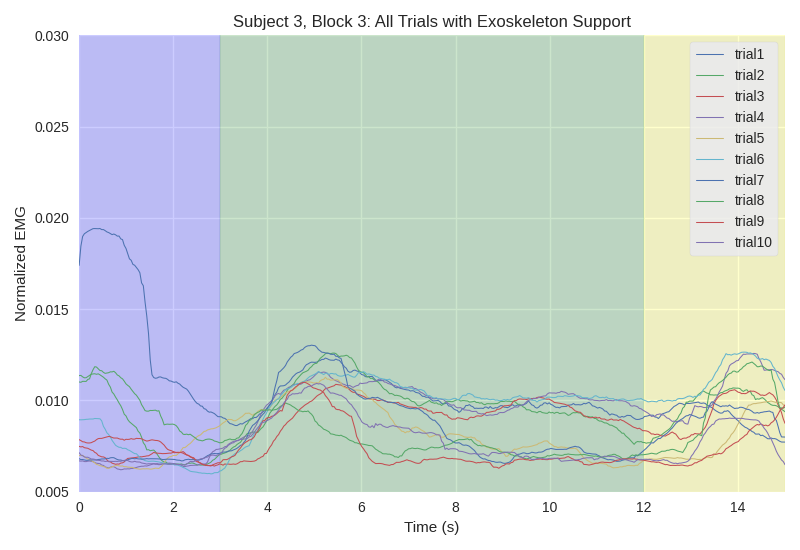

In [177]:
i = 2
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, [ymin, ymax], True)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': All Trials with Exoskeleton Support')
plt.tight_layout()

plt.savefig(save_dir+'all_trials_block'+str(i+1), format='png')

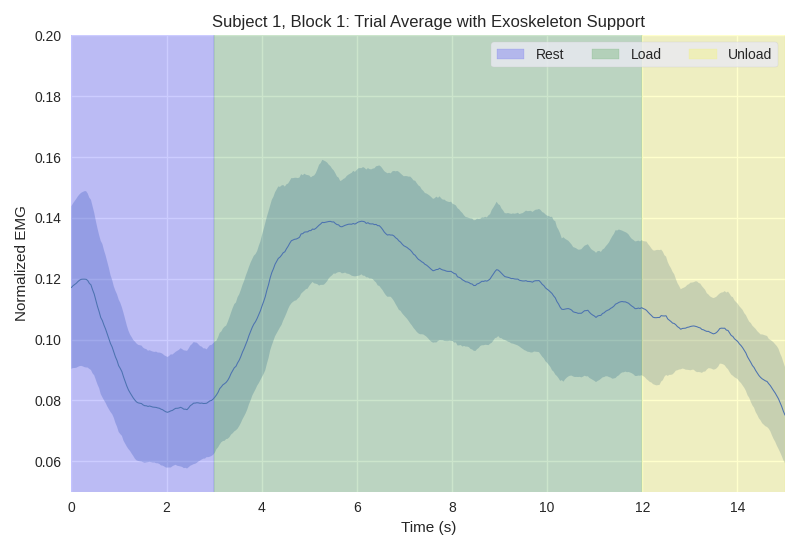

In [123]:
i = 0
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, [ymin, ymax], False)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': Trial Average with Exoskeleton Support')
plt.tight_layout()

# plt.savefig(save_dir+'trial_avg_block'+str(i+1), format='png')

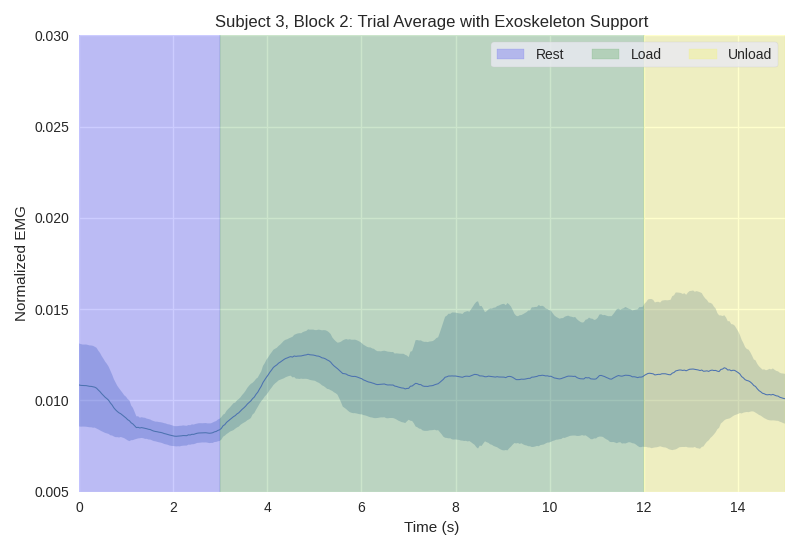

In [179]:
i = 1
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, [ymin, ymax], False)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': Trial Average with Exoskeleton Support')
plt.tight_layout()

plt.savefig(save_dir+'trial_avg_block'+str(i+1), format='png')

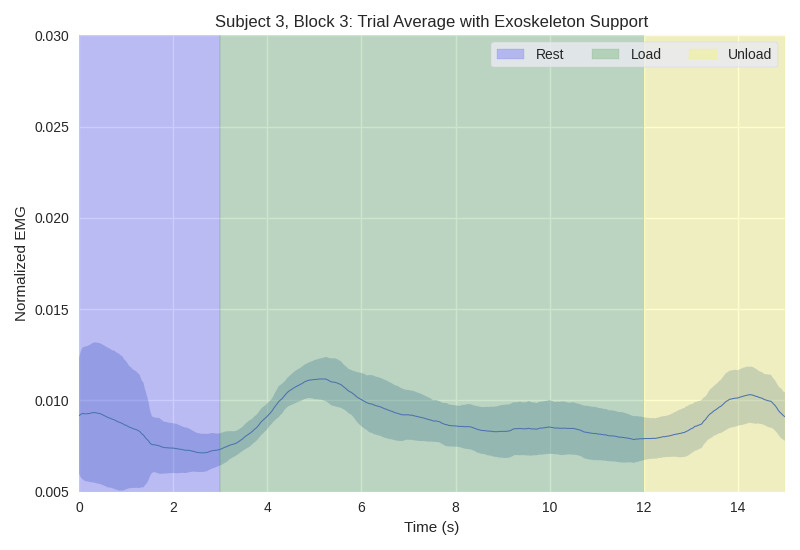

In [180]:
i = 2
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, [ymin, ymax], False)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': Trial Average with Exoskeleton Support')
plt.tight_layout()

plt.savefig(save_dir+'trial_avg_block'+str(i+1), format='png')

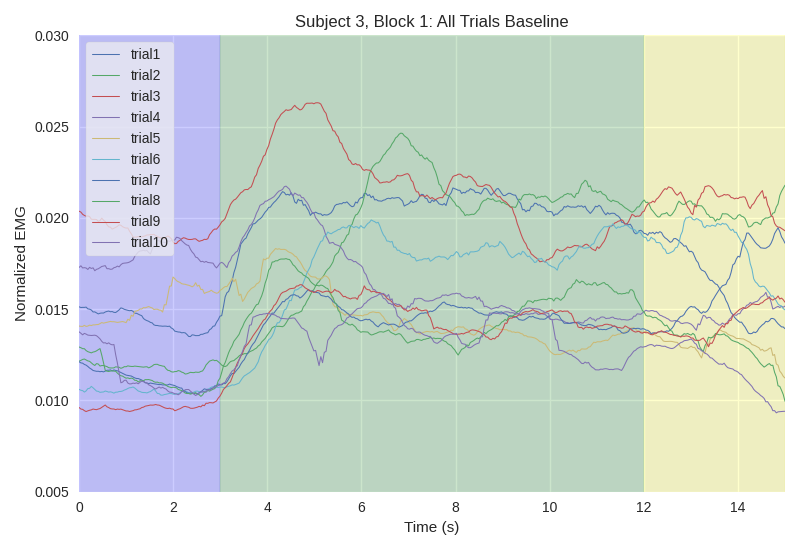

In [181]:
i = 0
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, [ymin, ymax], True)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': All Trials Baseline')
plt.tight_layout()

plt.savefig(save_dir+'baseline_all_trials_block'+str(i+1), format='png')

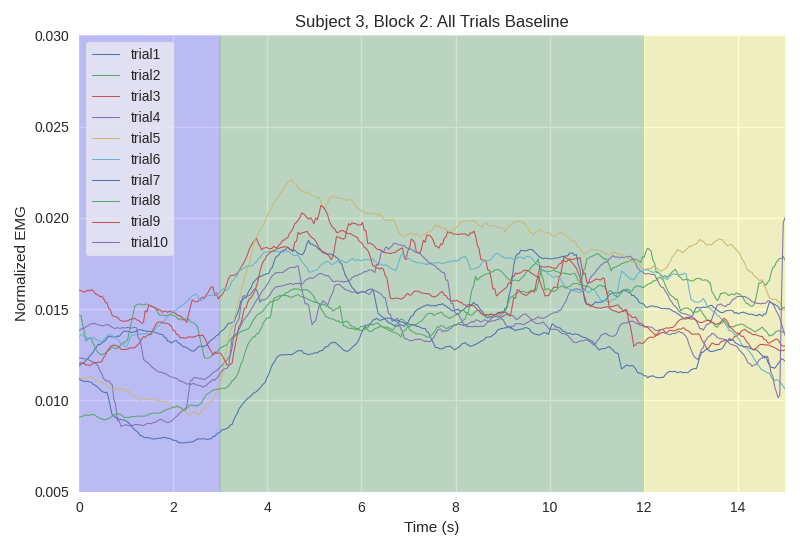

In [182]:
i = 1
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, [ymin, ymax], True)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': All Trials Baseline')
plt.tight_layout()

plt.savefig(save_dir+'baseline_all_trials_block'+str(i+1), format='png')

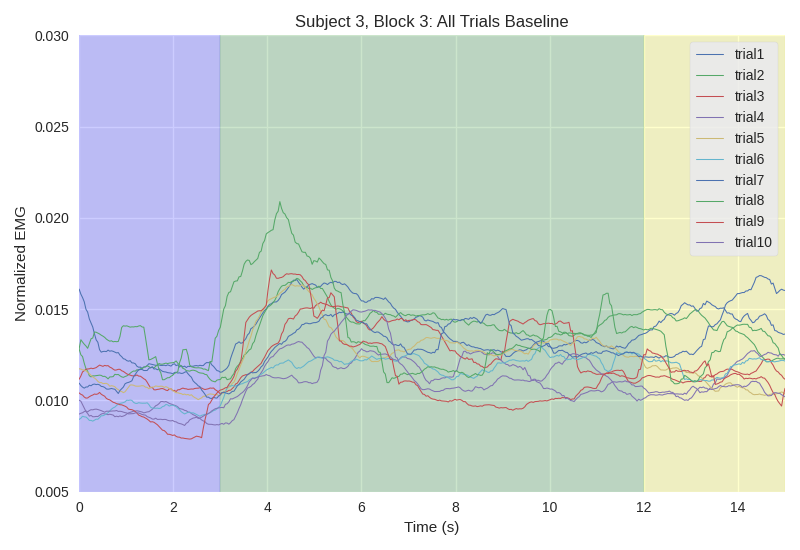

In [183]:
i = 2
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, [ymin, ymax], True)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': All Trials Baseline')
plt.tight_layout()

plt.savefig(save_dir+'baseline_all_trials_block'+str(i+1), format='png')

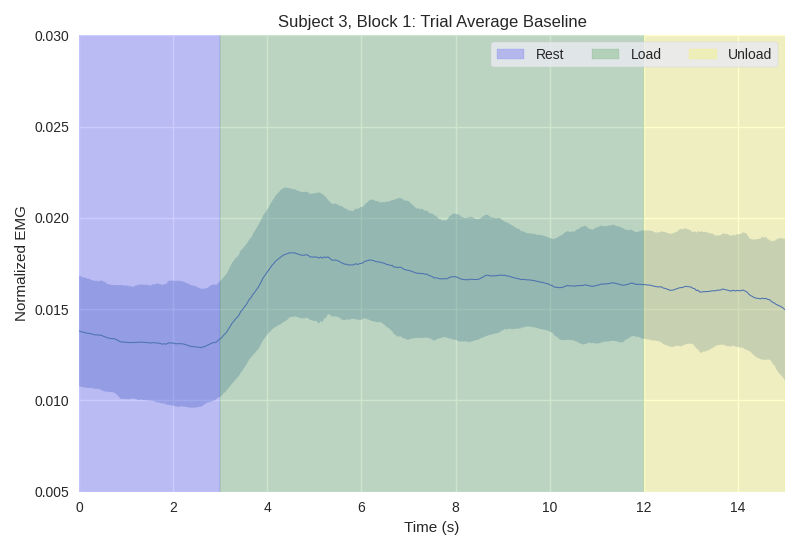

In [184]:
i = 0
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, [ymin, ymax], False)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': Trial Average Baseline')
plt.tight_layout()

plt.savefig(save_dir+'baseline_trial_avg_block'+str(i+1), format='png')

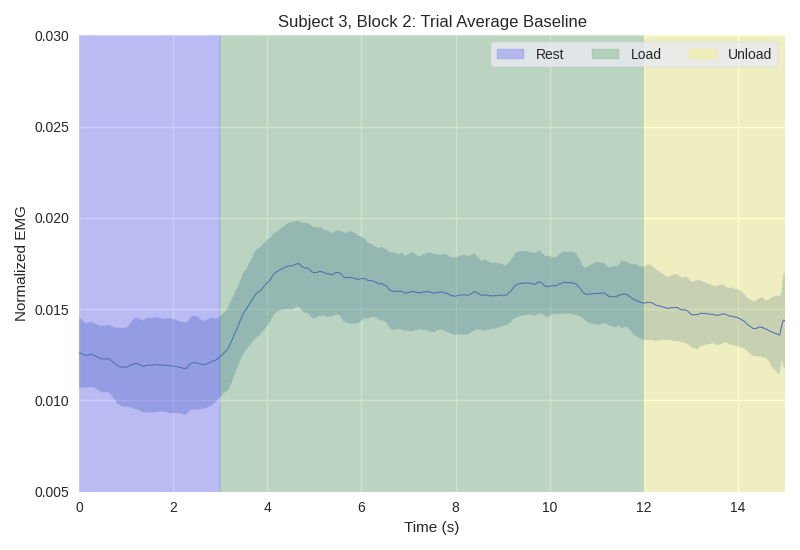

In [185]:
i = 1
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, [ymin, ymax], False)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': Trial Average Baseline')
plt.tight_layout()

plt.savefig(save_dir+'baseline_trial_avg_block'+str(i+1), format='png')

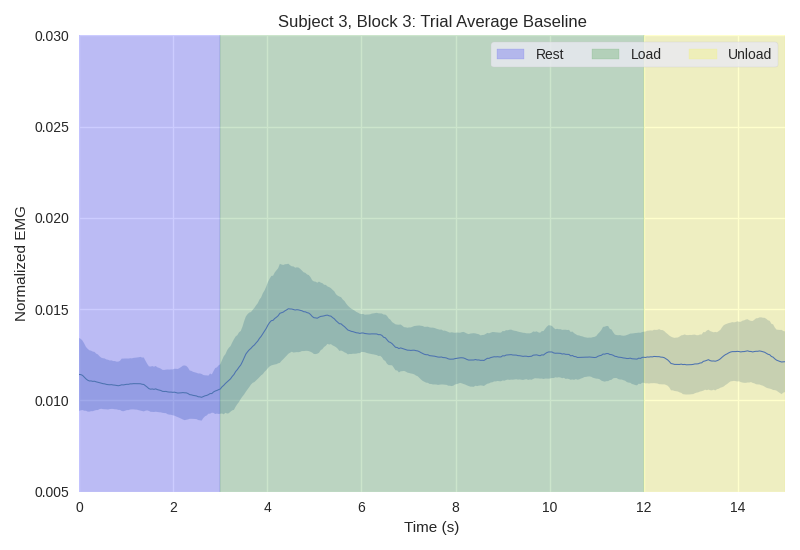

In [186]:
i = 2
plt.close('all')
figure, axis = plt.subplots()
eu.plot_rms_average_trial(axis, baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, [ymin, ymax], False)
axis.set_xlabel('Time (s)')
axis.set_ylabel('Normalized EMG')
axis.set_title('Subject ' + str(target) + ', Block ' + str(i+1) + ': Trial Average Baseline')
plt.tight_layout()

plt.savefig(save_dir+'baseline_trial_avg_block'+str(i+1), format='png')

# Calculate Averages

### Average Summary

In [269]:
trial_rest_avg, trial_load_avg, trial_unload_avg, trial_rest_var, trial_load_var, trial_unload_var = eu.calculate_average_all(trial_type_dflist, trial_emg_dflist, mvc_max)
baseline_rest_avg, baseline_load_avg, baseline_unload_avg, baseline_rest_var, baseline_load_var, baseline_unload_var = eu.calculate_average_all(baseline_type_dflist, baseline_emg_dflist, mvc_max)

trial_ratio_list = eu.load_rest_ratio(trial_load_avg, trial_rest_avg)
baseline_ratio_list = eu.load_rest_ratio(baseline_load_avg, baseline_rest_avg)

trial_diff_list = eu.load_rest_diff(trial_load_avg, trial_rest_avg)
baseline_diff_list = eu.load_rest_diff(baseline_load_avg, baseline_rest_avg)

In [270]:
for i in range(len(trial_rest_avg)):
    print("Trial " + str(i+1) + ":         rest: " + "{:.5f}".format(trial_rest_avg[i]) + " +/- " + "{:.5f}".format(trial_rest_var[i]) + ", load: " + "{:.5f}".format(trial_load_avg[i]) + "+/- " + "{:.5f}".format(trial_load_var[i]))

for i in range(len(baseline_rest_avg)):
    print("Baseline " + str(i+1) + ": rest: " + "{:.5f}".format(baseline_rest_avg[i]) + " +/- " + "{:.5f}".format(baseline_rest_var[i]) + ", load: " + "{:.5f}".format(baseline_load_avg[i]) + "+/- " + "{:.5f}".format(baseline_load_var[i]))

# "{:.2f}".format(self.objects.get(box.Class))

Trial 1:         rest: 0.09108 +/- 0.03924, load: 0.11458+/- 0.03685
Trial 2:         rest: 0.10096 +/- 0.03549, load: 0.12837+/- 0.03667
Trial 3:         rest: 0.06647 +/- 0.02226, load: 0.10105+/- 0.03063
Baseline 1: rest: 0.08892 +/- 0.01724, load: 0.12533+/- 0.02819
Baseline 2: rest: 0.09411 +/- 0.02538, load: 0.12670+/- 0.02775
Baseline 3: rest: 0.09261 +/- 0.01883, load: 0.13097+/- 0.03067


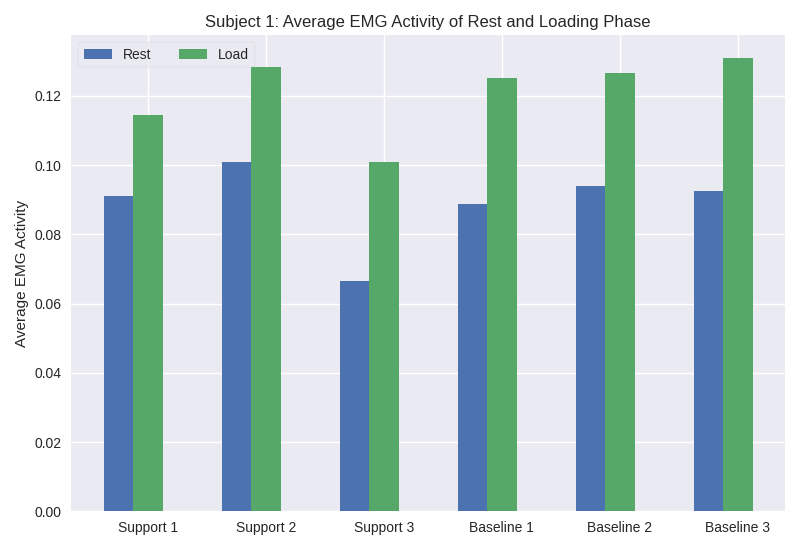

In [271]:
plt.close('all')

figure, axis = plt.subplots()

block_type = ("Support 1", "Support 2", "Support 3", "Baseline 1", "Baseline 2", "Baseline 3")
block_avgs = {
    'Rest': tuple(trial_rest_avg + baseline_rest_avg),
    'Load': tuple(trial_load_avg + baseline_load_avg)
}

x = np.arange(len(block_type))
width = 0.25
multiplier = 0

for attribute, measurement in block_avgs.items():
    offset = width  * multiplier
    rects = axis.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

axis.set_xticks(x+width)
axis.set_xticklabels(block_type)
axis.set_ylabel('Average EMG Activity')
axis.legend(loc='upper left', ncol=2, frameon=True)
axis.set_title('Subject '+str(target)+': Average EMG Activity of Rest and Loading Phase')
plt.tight_layout()

plt.savefig(save_dir+'average_rest_load.png')

In [272]:
for i in range(len(trial_diff_list)):
    print("Trial " + str(i+1) + ":         load to rest difference: " + "{:.4f}".format(trial_diff_list[i]) + " +/- " + "{:.4f}".format(trial_load_var[i]+trial_rest_var[i]))

for i in range(len(baseline_diff_list)):
    print("Baseline " + str(i+1) + ": load to rest difference: " + "{:.4f}".format(baseline_diff_list[i]) + " +/- " + "{:.4f}".format(baseline_load_var[i]+baseline_rest_var[i]))

Trial 1:         load to rest difference: 0.0235 +/- 0.0761
Trial 2:         load to rest difference: 0.0274 +/- 0.0722
Trial 3:         load to rest difference: 0.0346 +/- 0.0529
Baseline 1: load to rest difference: 0.0364 +/- 0.0454
Baseline 2: load to rest difference: 0.0326 +/- 0.0531
Baseline 3: load to rest difference: 0.0384 +/- 0.0495


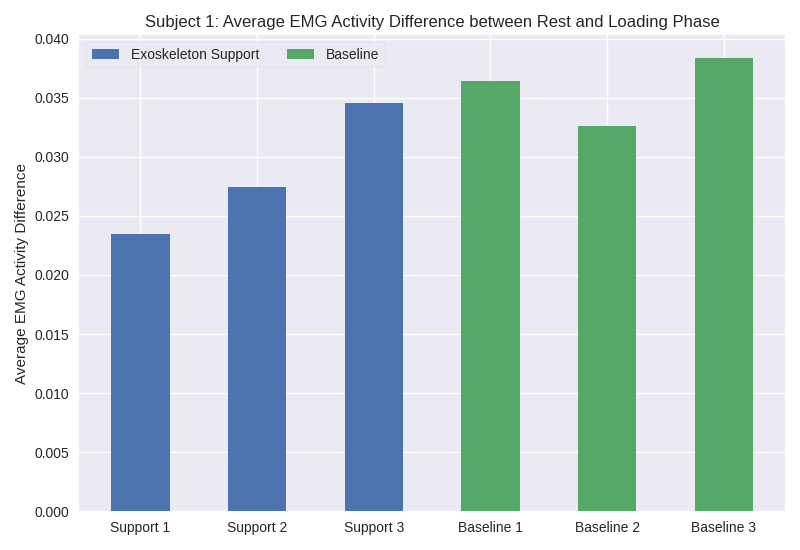

In [273]:
plt.close('all')

figure, axis = plt.subplots()

block_type = ("Support 1", "Support 2", "Support 3", "Baseline 1", "Baseline 2", "Baseline 3")
block_avgs = {
    'Rest': tuple(trial_rest_avg + baseline_rest_avg),
    'Load': tuple(trial_load_avg + baseline_load_avg)
}

x = np.arange(len(block_type))
width = 0.5

axis.bar(x[:3], trial_diff_list, width, label='Exoskeleton Support')
axis.bar(x[3:], baseline_diff_list, width, label='Baseline')

axis.set_xticks(x)
axis.set_xticklabels(block_type)
axis.set_ylabel('Average EMG Activity Difference')
axis.legend(loc='upper left', frameon=True, ncol=2)
axis.set_title('Subject '+str(target)+': Average EMG Activity Difference between Rest and Loading Phase')
plt.tight_layout()

plt.savefig(save_dir+'average_diff.png')

### Average RMS Summary

In [101]:
trial_rest_rms_avg, trial_load_rms_avg, trial_unload_rms_avg, trial_rest_rms_var, trial_load_rms_var, trial_unload_rms_var = eu.calculate_average_rms_all(trial_type_dflist, trial_emg_dflist, mvc_max, window_length)
baseline_rest_rms_avg, baseline_load_rms_avg, baseline_unload_rms_avg, baseline_rest_rms_var, baseline_load_rms_var, baseline_unload_rms_var = eu.calculate_average_rms_all(baseline_type_dflist, baseline_emg_dflist, mvc_max, window_length)

trial_rms_diff_list = eu.load_rest_diff(trial_load_rms_avg, trial_rest_rms_avg)
baseline_rms_diff_list = eu.load_rest_diff(baseline_load_rms_avg, baseline_rest_rms_avg)

for i in range(len(trial_rest_rms_avg)):
    print("Trial " + str(i+1) + ":         rest: " + "{:.5f}".format(trial_rest_rms_avg[i]) + " +/- " + "{:.5f}".format(trial_rest_rms_var[i]) + ", load: " + "{:.5f}".format(trial_load_rms_avg[i]) + " +/- " + "{:.5f}".format(trial_load_rms_var[i]))

for i in range(len(baseline_rest_rms_avg)):
    print("Baseline " + str(i+1) + ": rest: " + "{:.5f}".format(baseline_rest_rms_avg[i]) + " +/- " + "{:.5f}".format(baseline_rest_rms_var[i]) + ", load: " + "{:.5f}".format(baseline_load_rms_avg[i]) + " +/- " + "{:.5f}".format(baseline_load_rms_var[i]))

Trial 1:         rest: 0.01253 +/- 0.00004, load: 0.01149 +/- 0.00001
Trial 2:         rest: 0.00931 +/- 0.00000, load: 0.01128 +/- 0.00001
Trial 3:         rest: 0.00854 +/- 0.00001, load: 0.00905 +/- 0.00000
Baseline 1: rest: 0.01331 +/- 0.00001, load: 0.01690 +/- 0.00001
Baseline 2: rest: 0.01208 +/- 0.00000, load: 0.01615 +/- 0.00000
Baseline 3: rest: 0.01084 +/- 0.00000, load: 0.01303 +/- 0.00000


In [102]:
for i in range(len(trial_rms_diff_list)):
    print("Trial " + str(i+1) + ":         load to rest difference: " + "{:.5f}".format(trial_rms_diff_list[i]) + " +/- " + "{:.5f}".format(trial_load_rms_var[i]+trial_rest_rms_var[i]))

for i in range(len(baseline_rms_diff_list)):
    print("Baseline " + str(i+1) + ": load to rest difference: " + "{:.5f}".format(baseline_rms_diff_list[i]) + " +/- " + "{:.5f}".format(baseline_load_rms_var[i]+baseline_rest_rms_var[i]))

Trial 1:         load to rest difference: -0.00104 +/- 0.00004
Trial 2:         load to rest difference: 0.00197 +/- 0.00001
Trial 3:         load to rest difference: 0.00051 +/- 0.00001
Baseline 1: load to rest difference: 0.00358 +/- 0.00002
Baseline 2: load to rest difference: 0.00407 +/- 0.00001
Baseline 3: load to rest difference: 0.00218 +/- 0.00001


### Load Characteristics

In [274]:
trial_peaks = []
trial_equilibrium = []
trial_diff = []

for i in range(len(trial_type_dflist)):
    peak_values, peak_positions, equilibrium_values = eu.calculate_trial_characteristics(trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, 3, 3)
    peak_avg = np.mean(peak_values)
    equilibrium_avg = np.mean(equilibrium_values)
    diff_avg = peak_avg - equilibrium_avg
    trial_peaks.append(peak_avg)
    trial_equilibrium.append(equilibrium_avg)
    trial_diff.append(diff_avg)

In [275]:
print(trial_peaks)
print(trial_equilibrium)
print(trial_diff)

[0.14853782258607437, 0.16227796796684496, 0.13222780774524528]
[0.11006745991301654, 0.1246357436112012, 0.10431289139004196]
[0.038470362673057826, 0.037642224355643766, 0.027914916355203323]


In [276]:
baseline_peaks = []
baseline_equilibrium = []
baseline_diff = []

for i in range(len(trial_type_dflist)):
    peak_values, peak_positions, equilibrium_values = eu.calculate_trial_characteristics(baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, 3, 3)
    peak_avg = np.mean(peak_values)
    equilibrium_avg = np.mean(equilibrium_values)
    diff_avg = peak_avg - equilibrium_avg
    baseline_peaks.append(peak_avg)
    baseline_equilibrium.append(equilibrium_avg)
    baseline_diff.append(diff_avg)

In [277]:
print(baseline_peaks)
print(baseline_equilibrium)
print(baseline_diff)

[0.15477406758233198, 0.14382916964135187, 0.15863103902321246]
[0.12666876621718234, 0.13077709732199266, 0.13159118889850785]
[0.028105301365149632, 0.013052072319359204, 0.027039850124704612]


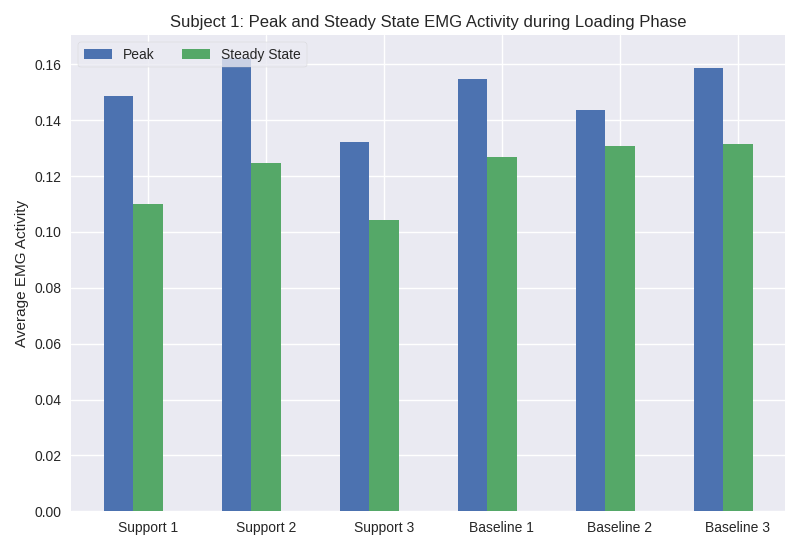

In [278]:
plt.close('all')

figure, axis = plt.subplots()

block_type = ("Support 1", "Support 2", "Support 3", "Baseline 1", "Baseline 2", "Baseline 3")
block_avgs = {
    'Peak': tuple(trial_peaks + baseline_peaks),
    'Steady State': tuple(trial_equilibrium + baseline_equilibrium)
}

x = np.arange(len(block_type))
width = 0.25
multiplier = 0

for attribute, measurement in block_avgs.items():
    offset = width  * multiplier
    rects = axis.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

axis.set_xticks(x+width)
axis.set_xticklabels(block_type)
axis.set_ylabel('Average EMG Activity')
axis.legend(loc='upper left', ncol=2, frameon=True)
axis.set_title('Subject '+str(target)+': Peak and Steady State EMG Activity during Loading Phase')
plt.tight_layout()

plt.savefig(save_dir+'peak_steady_average.png')

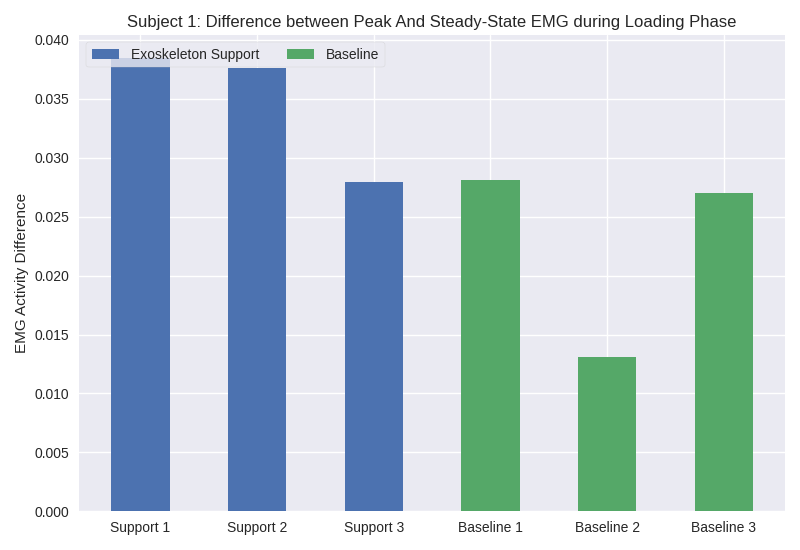

In [279]:
plt.close('all')

figure, axis = plt.subplots()

block_type = ("Support 1", "Support 2", "Support 3", "Baseline 1", "Baseline 2", "Baseline 3")
block_avgs = {
    'Peak': tuple(trial_peaks + baseline_peaks),
    'Steady State': tuple(trial_equilibrium + baseline_equilibrium)
}

x = np.arange(len(block_type))
width = 0.5

axis.bar(x[:3], trial_diff, width, label='Exoskeleton Support')
axis.bar(x[3:], baseline_diff, width, label='Baseline')

axis.set_xticks(x)
axis.set_xticklabels(block_type)
axis.set_ylabel('EMG Activity Difference')
axis.legend(loc='upper left', frameon=True, ncol=2)
axis.set_title('Subject '+str(target)+': Difference between Peak And Steady-State EMG during Loading Phase')
plt.tight_layout()

plt.savefig(save_dir+'peak_equilibrium_diff.png')

#### Outlier Removal Exoskeleton Support Blocks

In [214]:
trial_peaks = []
trial_equilibrium = []
trial_diff = []

In [216]:
i = 0
peak_values, peak_positions, equilibrium_values = eu.calculate_trial_characteristics(trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, 3, 3)
peak_positions

array([1.06993007, 2.01398601, 1.35314685, 1.57342657, 2.95804196,
       2.83216783, 1.95104895, 2.13986014, 2.32867133, 1.22727273])

In [130]:
outliers = [2, 7]
peak_positions = np.delete(peak_positions, outliers)
peak_values = np.delete(peak_values, outliers)
equilibrium_values = np.delete(equilibrium_values, outliers)

peak_avg = np.mean(peak_values)
equilibrium_avg = np.mean(equilibrium_values)
diff_avg = peak_avg - equilibrium_avg

trial_peaks.append(peak_avg)
trial_equilibrium.append(equilibrium_avg)
trial_diff.append(diff_avg)

In [205]:
i = 1
peak_values, peak_positions, equilibrium_values = eu.calculate_trial_characteristics(trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, 3)
peak_positions

array([3.73469388, 3.91836735, 5.75510204, 0.8877551 , 2.87755102,
       5.54081633, 3.        , 8.90816327, 5.41836735, 0.97959184])

In [135]:
outliers = [2, 5, 7]
peak_positions = np.delete(peak_positions, outliers)
peak_values = np.delete(peak_values, outliers)
equilibrium_values = np.delete(equilibrium_values, outliers)

peak_avg = np.mean(peak_values)
equilibrium_avg = np.mean(equilibrium_values)
diff_avg = peak_avg - equilibrium_avg

trial_peaks.append(peak_avg)
trial_equilibrium.append(equilibrium_avg)
trial_diff.append(diff_avg)

In [206]:
i = 2
peak_values, peak_positions, equilibrium_values = eu.calculate_trial_characteristics(trial_type_dflist[i], trial_emg_dflist[i], mvc_max, window_length, 3)
peak_positions

array([1.60824742, 7.05154639, 2.87628866, 2.44329897, 2.56701031,
       1.94845361, 3.68041237, 8.72164948, 2.81443299, 3.12371134])

In [137]:
outliers = [1, 7]
peak_positions = np.delete(peak_positions, outliers)
peak_values = np.delete(peak_values, outliers)
equilibrium_values = np.delete(equilibrium_values, outliers)

peak_avg = np.mean(peak_values)
equilibrium_avg = np.mean(equilibrium_values)
diff_avg = peak_avg - equilibrium_avg

trial_peaks.append(peak_avg)
trial_equilibrium.append(equilibrium_avg)
trial_diff.append(diff_avg)

#### Outlier Removal Baseline Blocks

In [209]:
baseline_peaks = []
baseline_equilibrium = []
baseline_diff = []

In [210]:
i = 0
peak_values, peak_positions, equilibrium_values = eu.calculate_trial_characteristics(baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, 3)
peak_positions

array([1.45945946, 3.98310811, 2.31081081, 1.94594595, 2.73648649,
       1.18581081, 1.33783784, 1.39864865, 2.73648649, 1.36824324])

In [144]:
outliers = [1]
peak_positions = np.delete(peak_positions, outliers)
peak_values = np.delete(peak_values, outliers)
equilibrium_values = np.delete(equilibrium_values, outliers)

peak_avg = np.mean(peak_values)
equilibrium_avg = np.mean(equilibrium_values)
diff_avg = peak_avg - equilibrium_avg

baseline_peaks.append(peak_avg)
baseline_equilibrium.append(equilibrium_avg)
baseline_diff.append(diff_avg)

In [211]:
i = 1
peak_values, peak_positions, equilibrium_values = eu.calculate_trial_characteristics(baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, 3)
peak_positions

array([6.25423729, 1.46440678, 0.51864407, 1.37288136, 8.96949153,
       3.50847458, 5.30847458, 4.30169492, 6.46779661, 8.35932203])

In [146]:
outliers = [0, 4, 6, 8, 9]
peak_positions = np.delete(peak_positions, outliers)
peak_values = np.delete(peak_values, outliers)
equilibrium_values = np.delete(equilibrium_values, outliers)

peak_avg = np.mean(peak_values)
equilibrium_avg = np.mean(equilibrium_values)
diff_avg = peak_avg - equilibrium_avg

baseline_peaks.append(peak_avg)
baseline_equilibrium.append(equilibrium_avg)
baseline_diff.append(diff_avg)

In [212]:
i = 2
peak_values, peak_positions, equilibrium_values = eu.calculate_trial_characteristics(baseline_type_dflist[i], baseline_emg_dflist[i], mvc_max, window_length, 3)
peak_positions

array([2.76689189, 4.25675676, 3.25337838, 3.89189189, 1.48986486,
       4.25675676, 1.06418919, 1.55067568, 8.84797297, 4.77364865])

In [148]:
outliers = [0, 4, 6, 8, 9]
peak_positions = np.delete(peak_positions, outliers)
peak_values = np.delete(peak_values, outliers)
equilibrium_values = np.delete(equilibrium_values, outliers)

peak_avg = np.mean(peak_values)
equilibrium_avg = np.mean(equilibrium_values)
diff_avg = peak_avg - equilibrium_avg

baseline_peaks.append(peak_avg)
baseline_equilibrium.append(equilibrium_avg)
baseline_diff.append(diff_avg)

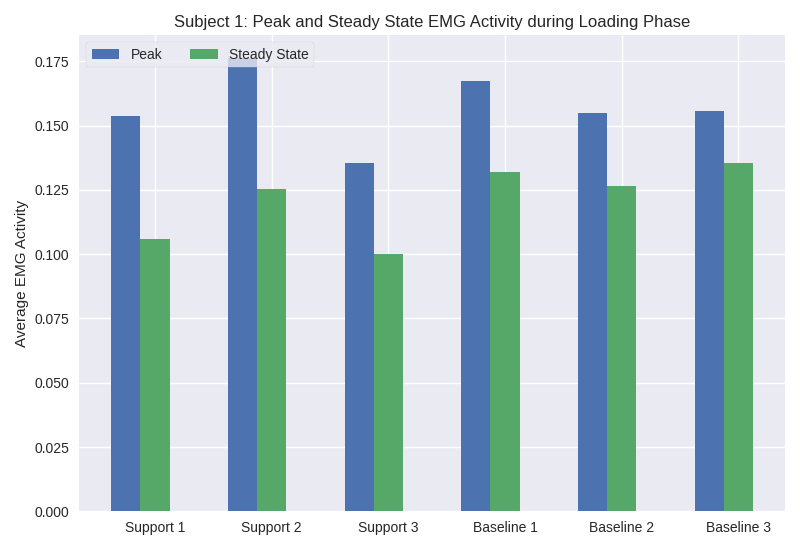

In [150]:
plt.close('all')

figure, axis = plt.subplots()

block_type = ("Support 1", "Support 2", "Support 3", "Baseline 1", "Baseline 2", "Baseline 3")
block_avgs = {
    'Peak': tuple(trial_peaks + baseline_peaks),
    'Steady State': tuple(trial_equilibrium + baseline_equilibrium)
}

x = np.arange(len(block_type))
width = 0.25
multiplier = 0

for attribute, measurement in block_avgs.items():
    offset = width  * multiplier
    rects = axis.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

axis.set_xticks(x+width)
axis.set_xticklabels(block_type)
axis.set_ylabel('Average EMG Activity')
axis.legend(loc='upper left', ncol=2, frameon=True)
axis.set_title('Subject '+str(target)+': Peak and Steady State EMG Activity during Loading Phase')
plt.tight_layout()

# plt.savefig(save_dir+'peak_steady_average', format='png')

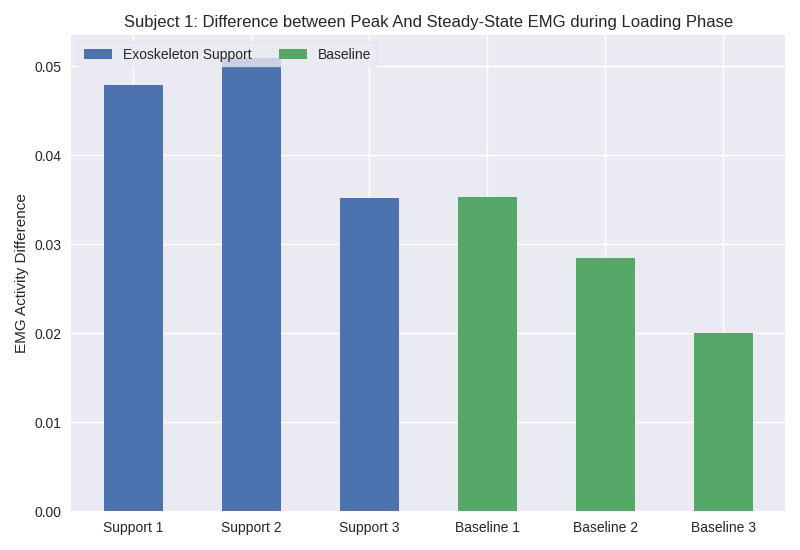

In [152]:
plt.close('all')

figure, axis = plt.subplots()

block_type = ("Support 1", "Support 2", "Support 3", "Baseline 1", "Baseline 2", "Baseline 3")
block_avgs = {
    'Peak': tuple(trial_peaks + baseline_peaks),
    'Steady State': tuple(trial_equilibrium + baseline_equilibrium)
}

x = np.arange(len(block_type))
width = 0.5

axis.bar(x[:3], trial_diff, width, label='Exoskeleton Support')
axis.bar(x[3:], baseline_diff, width, label='Baseline')

axis.set_xticks(x)
axis.set_xticklabels(block_type)
axis.set_ylabel('EMG Activity Difference')
axis.legend(loc='upper left', frameon=True, ncol=2)
axis.set_title('Subject '+str(target)+': Difference between Peak And Steady-State EMG during Loading Phase')
plt.tight_layout()

# plt.savefig(save_dir+'peak_equilibrium_diff', format='png')

### Load EMG to Rest EMG Ratio

In [62]:
for i in range(len(trial_ratio_list)):
    print("Trial " + str(i+1) + ":         load to rest ratio: " + "{:.6f}".format(trial_ratio_list[i]))

for i in range(len(baseline_ratio_list)):
    print("Baseline " + str(i+1) + ": load to rest ratio: " + "{:.6f}".format(baseline_ratio_list[i]))

Trial 1:         load to rest ratio: 1.258030
Trial 2:         load to rest ratio: 1.271491
Trial 3:         load to rest ratio: 1.520228
Baseline 1: load to rest ratio: 1.409558
Baseline 2: load to rest ratio: 1.346284
Baseline 3: load to rest ratio: 1.414306
